In [1]:
from math import sqrt
def _schedule(step : int):

    # to account for step = 0
    step += 1

    dm = 512
    warmup_steps = 4000

    return (1/sqrt(dm)) * min(1/sqrt(step), step * (1/warmup_steps))

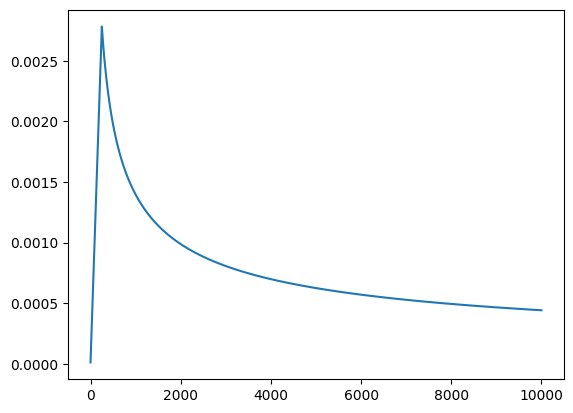

In [2]:
import matplotlib.pyplot as plt

x = [i for i in range(10000)]
y = [_schedule(i) for i in x]

plt.plot(x,y)

In [1]:
from modules.positional_encoding import SinCosPositionalEmbedding

embed = SinCosPositionalEmbedding(model_dimension=512, max_sequence_length=2024)

In [2]:
import numpy as np
embed_np = embed.pos_embedings.numpy()

shape = embed_np.shape
data_type = embed_np.dtype

width_mult = 9  # make it almost square
positional_encodings_img = np.zeros((shape[0], width_mult*shape[1]), dtype=data_type)
for i in range(width_mult):
    positional_encodings_img[:, i::width_mult] = embed_np

In [3]:
import matplotlib.pyplot as plt

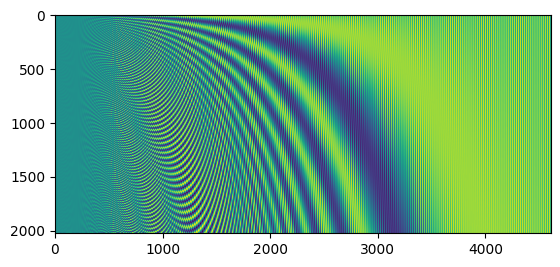

In [4]:
plt.imshow(positional_encodings_img)

In [1]:
import torch
from trainer import Trainer

tmp = torch.load('./transformer_checkpoints/2024-03-14_20-42-12/0/checkpoint.pt', map_location='cpu')

/home/luke/.cache/pypoetry/virtualenvs/transformer-4yGT6EIL-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/luke/.cache/pypoetry/virtualenvs/transformer-4yGT6EIL-py3.10/lib/python3.10/site-packages/pydantic/_internal/_fields.py:151: UserWarning: Field "model_dimension" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
from transformer import Transformer

mdl_cfg = Transformer.Config(
            max_sequence_len=128,
            num_decoder_blocks=6,
            num_encoder_blocks=6,
            num_heads=8,
            )

mdl = Transformer(mdl_cfg)
mdl.load_state_dict(state_dict=tmp['model_state_dict'])

<All keys matched successfully>

In [5]:
mdl.inference(['My name is Luke.'])

['Beschreibung Beschreibung Beschreibung Beschreibung bis bis bis bis bis bis bis bis bis bis bis bis bis bis bisloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadloadload']